# Homework 2
***
**Name**: $<$insert name here$>$ 
***

Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.

The rules to be followed for the assignment are:

- Do **NOT** load additional packages beyond what we've shared in the cells below. 
- Some problems with code may be autograded.  If we provide a function or class API **do not** change it.
- Do not change the location of the data or data directory.  Use only relative paths to access the data. 

In [76]:
import pandas as pd
import numpy as np
import pickle
from pathlib import Path
import math

### Problem 1
***

There are two functions that need to be completed:

#### normalization(fname, attr, normType)

- This function takes in the location of the data file, the attribute that has to be normalised (one of the values from 'Open','High','Low','Close','Volume', given as column indices) and the type of normalization to be performed ('min_max' or 'z_score')

- Based on the normalisation type that is mentioned, you will have to apply the appropriate formula and return a dictionary where key = original value in the dataset, value = normalised value

- A sample dataset has been provided to you at this location "./data/HistoricalQuotes.csv". Use this dataset to test the functionality you are building.

#### correlation (fname1, attr1, fname2, attr2)

- This function takes in the location of the first data file, the attribute that has to be used in the first file, the location of the second data file and the attribute that has to be used in the second file.

- This function has to calculate the correlation coefficient between the two attributes mentioned in the two files.

- Two Sample datasets have been provided to you in "./data/test1.csv" and "./data/test2.csv" respectively.

- The two sample files have the following attributes 'Open','High','Last','Low','Volume'. Use these two sample files to test the functionality you are building.

Note:
- If the test case fails, one way to debug is to see the output of the testing data and comparing it to your output.
- Initially the test case will be failed as there is no code in the below two functions.

In [77]:
def normalization (fname, attr, normType):
    '''
    Input Parameters:
        fname: Name of the csv file contiaining historical quotes
        attr: The attribute to be normalized 
        normType: The type of normalization 
    Output:
        a dictionary where each key is the original column value and each value is the normalised column value. 
    '''
    result = {
        
    }
    
    # your code here
    result = {}
    
    # Load the dataset
    df = pd.read_csv(fname)
    
    # Extract the specified attribute column
    column_data = df.iloc[:, attr]
    
    if normType == 'min_max':
        # Min-Max normalization
        min_val = np.min(column_data)
        max_val = np.max(column_data)
        normalized_data = (column_data - min_val) / (max_val - min_val)
    elif normType == 'z_score':
        # Z-score normalization
        mean_val = np.mean(column_data)
        std_dev = np.std(column_data)
        normalized_data = (column_data - mean_val) / std_dev
    else:
        raise ValueError("Invalid normalization type. Use 'min_max' or 'z_score'")
    
    # Create the result dictionary
    for original, normalized in zip(column_data, normalized_data):
        result[original] = normalized
    
    return result

In [58]:
'''
This cell has hidden test cases that will run after you submit your assignment. 
You can troubleshoot using the unit tests we shared below.
'''


'\nThis cell has hidden test cases that will run after you submit your assignment. \nYou can troubleshoot using the unit tests we shared below.\n'

In [96]:
def correlation (fname1, attr1, fname2, attr2):
    '''
    Input Parameters:
        fname1: name of the first csv file containing historical quotes
        attr1: The attribute to consider in the first csv file (fname1)
        fname2: name of the second csv file containing historical quotes
        attr2: The attribute to consider in the second csv file (fname2)
        
    Output:
        correlation coefficient between attr1 in fname1 and attr2 in fname2
    '''
    
#     correlation_coefficient = 0.0
        
    
    #TODO: Write code given the Input / Output Paramters.
    
    # Load the datasets
    df1 = pd.read_csv(fname1)
    df2 = pd.read_csv(fname2)

    # Extract the specified attribute columns
    column_data1 = df1.iloc[:, attr1]
    column_data2 = df2.iloc[:, attr2]

    # Calculate the correlation coefficient
    correlation_coefficient = np.corrcoef(column_data1, column_data2, rowvar=False)[0, 1]
    
    # your code here
    
    
    return correlation_coefficient


In [97]:
'''
This cell has hidden test cases that will run after you submit your assignment. 
You can troubleshoot using the unit tests we shared below.
'''


'\nThis cell has hidden test cases that will run after you submit your assignment. \nYou can troubleshoot using the unit tests we shared below.\n'

In [98]:
import unittest

class TestKnn(unittest.TestCase):
    def setUp(self):
        self.loc1 = "data/test1.csv"
        self.loc2 = "data/test2.csv"
        file = open('data/testing_normalization', 'rb')
        self.data_normalization = pickle.load(file)
        file.close()
        file = open('data/testing_correlation', 'rb')
        self.data_correlation = pickle.load(file)
        file.close()
        file = open('data/testing_zscore', 'rb')
        self.zscore = pickle.load(file)
        
    def test0(self):
        """
        Test min_max normalization 
        """
        result = normalization("./data/normalization_test_data.csv", 0, "min_max")
        for key,value in self.data_normalization.items():
            self.assertAlmostEqual(result[key],value, places = 1)
            
    
    def test1(self):
        """
        Test zcore normalization
        """
        result = normalization("./data/normalization_test_data.csv", 1, "z_score")
        for key, value in self.zscore.items():
            self.assertAlmostEqual(result[key], value, places = 1)
    
    def test2(self):
        """
        Test correlation 
        """
        result = correlation('./data/correlation_test_data.csv', 0, "./data/correlation_test_data.csv", 0)
        self.assertAlmostEqual(result,self.data_correlation, places = 1)
       
   
tests = TestKnn()
tests_to_run = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(tests_to_run)

...
----------------------------------------------------------------------
Ran 3 tests in 0.025s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

### Problem 2
***

There are 4 functions that need to be completed:

1. For each of the graphs, the input function parameters and the expected output has been mentioned below.
2. Use the dataset provided in "./data/HistoricalQuotes.csv" to plot the below graphs.
3. Instructions have been provided within each function regarding which attributes to choose from.
4. The dataset has the following attributes
    - Date
    - Close
    - Volume
    - Open
    - High
    - Low

Note:
- Make sure the dataset you are using is the one mentioned in the problem statement.
- After defining your functions. Create another block to call these functions by passing the attributes mentioned in canvas.

In [62]:
import matplotlib
# Plot size to 14" x 7"
matplotlib.rc('figure', figsize = (14, 7))
# Font size to 14
matplotlib.rc('font', size = 14)
# Do not display top and right frame lines
matplotlib.rc('axes.spines', top = False, right = False)
# Remove grid lines
matplotlib.rc('axes', grid = False)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')

In [63]:
def temporal_graph():
    '''Input : x_data and y_data are the lists containing the data points for x and y axis
    xlabel and ylabel are the labels that should be given to the corresponding axes
    title contains the title of the graph
    
    Output : 
    Plot the temporal change of attributes High and Low values
    Return a temporal graph with attributes Date on x-axis and a tuple of High and Low on y-axis displayed
    
    x_data - a python list of Dates using "Date" attribute from the dataset
    y_data - a tuple of the High and Low values respectively. 'High' and 'Low' should be stored as python lists.
             Ex: y_data = (list(df['attr_1']), list(df['attr_2']))
    xlabel, ylabel - A string value representing the axes labels
    title - A string representing the title for the graph
    '''
    
    df = pd.read_csv('./data/HistoricalQuotes.csv')
    
    # your code here
    # Extract relevant data
    x_data = list(df['Date'])
    y_data = (list(df['High']), list(df['Low']))
    xlabel = 'Date'
    ylabel = 'High and Low Values'
    title = 'Temporal Change of High and Low Values'
    
    
    return x_data,y_data,xlabel,ylabel,title

In [64]:
'''
This cell has hidden test cases that will run after you submit your assignment. 
You can troubleshoot by calling the function and checking return types.
'''


'\nThis cell has hidden test cases that will run after you submit your assignment. \nYou can troubleshoot by calling the function and checking return types.\n'

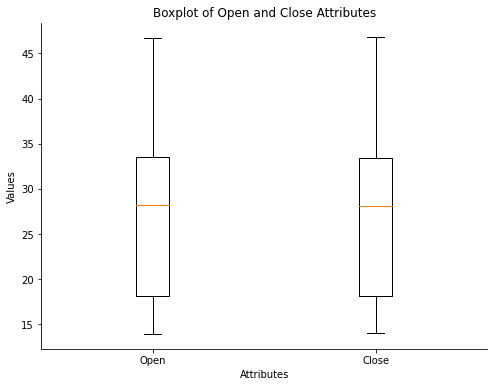

(([38.52,
   41.2,
   42.74,
   41.52,
   40.61,
   40.99,
   40.5,
   40.97,
   40.55,
   40.44,
   39.68,
   38.99,
   38.62,
   38.09,
   38.28,
   37.95,
   37.74,
   37.43,
   37.5,
   37.59,
   38.36,
   37.42,
   36.85,
   36.56,
   35.92,
   36.41,
   37.33,
   36.73,
   36.97,
   36.45,
   37.58,
   38.28,
   37.65,
   36.97,
   37.79,
   35.8,
   35.31,
   34.13,
   35.12,
   33.53,
   35.72,
   35.46,
   35.88,
   33.2,
   31.96,
   31.55,
   31.3,
   30.15,
   29.63,
   28.51,
   31.12,
   31.54,
   32.53,
   33.75,
   33.57,
   34.64,
   34.3,
   34.49,
   35.14,
   32.91,
   33.94,
   33.13,
   36.12,
   35.99,
   35.96,
   34.47,
   34.5,
   32.61,
   32.19,
   31.06,
   31.56,
   31.5,
   33.63,
   33.6,
   32.38,
   32.1,
   30.5,
   29.7,
   29.7,
   28.3,
   27.83,
   29.24,
   29.85,
   29.65,
   29.09,
   28.08,
   28.35,
   28.67,
   27.6,
   28.0,
   28.79,
   30.06,
   30.4,
   29.13,
   27.99,
   28.43,
   27.0,
   26.39,
   26.31,
   27.16,
   26.86,
   27.1,


In [74]:
import pandas as pd
import matplotlib.pyplot as plt

def boxplot():
    '''Input : x_data and y_data are the lists containing the data points for x and y axis
    base_color and median_color can be used to set colors in the graph.
    xlabel and ylabel are the labels that should be given to the corresponding axes
    title contains the title of the graph.
    
    Output : A boxplot with Open and Close attributes on the x-axis displayed
    
    x_data - a tuple of Open and Close values respectively. Open and Close should be stored as a python list.
             Ex: x_data = (list(df['attr_1']), list(df['attr_2']))
    xlabel, ylabel - A string value representing the axes labels
    title - A string representing the title for the graph
    '''
    
    # Read the dataset
    df = pd.read_csv('./data/HistoricalQuotes.csv')
    
    # Extract relevant data
    x_data = (list(df['Open']), list(df['Close']))
    xlabel = 'Attributes'
    ylabel = 'Values'
    title = 'Boxplot of Open and Close Attributes'
    
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.boxplot(x_data, labels=['Open', 'Close'])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    
    return x_data, xlabel, ylabel, title

# Call the function
boxplot()


In [66]:
'''
This cell has hidden test cases that will run after you submit your assignment. 
You can troubleshoot by calling the function and checking return types.
'''


'\nThis cell has hidden test cases that will run after you submit your assignment. \nYou can troubleshoot by calling the function and checking return types.\n'

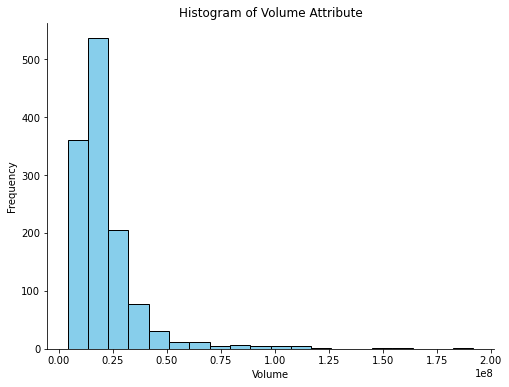

([16117250,
  17824990,
  18760840,
  26800040,
  10478790,
  7468349,
  8033773,
  13055040,
  12532530,
  12470520,
  20496570,
  9758567,
  7745448,
  17077240,
  8572471,
  10188500,
  10377320,
  13259410,
  11013330,
  20486050,
  29298410,
  11341050,
  10478860,
  10052110,
  10596690,
  15488020,
  18551550,
  9997391,
  10675570,
  13566850,
  22911330,
  23068340,
  90266690,
  18185150,
  19275870,
  16866970,
  18571110,
  24353300,
  16579870,
  18533250,
  22480570,
  15238720,
  34648750,
  109654700,
  27940880,
  22399970,
  14553750,
  20779000,
  20647990,
  27482820,
  56913650,
  17802560,
  16586770,
  20549340,
  12896580,
  19345480,
  10543560,
  12266140,
  20132420,
  19342190,
  14709350,
  23727860,
  17480660,
  17840740,
  20211940,
  23211540,
  20265080,
  28396340,
  15318430,
  14583620,
  39427680,
  37323840,
  24550870,
  20489330,
  13310720,
  22881670,
  26955490,
  17386160,
  15790020,
  15939160,
  12364650,
  19401660,
  13734500,
  1383975

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

def histogram():
    '''Input : data is the list containing the data points for histogram buckets
    xlabel and ylabel are the labels that should be given to the corresponding axes
    title contains the title of the graph
    
    Output : A histogram of the Volume attribute displayed
    
    data - A python list containing the data associated with the Volume attribute
    x_label, y_label - A string representing the axes labels 
    '''

    # Read the dataset
    df = pd.read_csv('./data/HistoricalQuotes.csv')

    # Extract Volume data
    data = list(df['Volume'])

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=20, color='skyblue', edgecolor='black')
    plt.xlabel('Volume')
    plt.ylabel('Frequency')
    plt.title('Histogram of Volume Attribute')
    plt.show()

    x_label = 'Volume'
    y_label = 'Frequency'

    return data, x_label, y_label

# Call the function
histogram()


In [68]:
'''
This cell has hidden test cases that will run after you submit your assignment. 
You can troubleshoot by calling the function and checking return types.
'''


'\nThis cell has hidden test cases that will run after you submit your assignment. \nYou can troubleshoot by calling the function and checking return types.\n'

In [69]:
def amzn_new_plot():
    '''Define this function as you would seem fit to display the plot that interests you using
    the same dataset. Define your function parameters and display the resulting plots'''